In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import os
from scipy.misc import imread, imresize
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline
print('tensorflow version is : ',tf.__version__)

tensorflow version is :  1.4.0


# Download MNIST dataset

In [2]:
mnist = input_data.read_data_sets('./data/mnist', one_hot=True) # download

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


# Generate rotated or shifted Data

In [3]:
from scipy import ndimage
def data_generation(images, labels, gener_num):
    expanded_images_input = []
    expanded_images_output = []
    for x,y in zip(images, labels):
        
        bg_value = np.median(x) # this is regarded as background's value, median color to be background color        
        image = np.reshape(x, (-1, 28))
        
        data_label = np.where(y==1)
        data_label = np.array(data_label, np.int32)
        
        gener_type = np.random.rand(1) # rotate or shift
        move_type = np.random.rand(1) # left or right
          

        if move_type > 0.5:
            mv = 1 # conterclockwise, shift right

        else:
            mv = -1 # clockwise, shift left
  
        for i in range(30):
            
            if data_label != np.array([gener_num]):
                continue
            
            
            if gener_type > 0.5:
                # rotate image
          
                angle = mv*i*6
                new_img = ndimage.rotate(image,angle,reshape=False, cval=bg_value)
            else:
                # shift image
          
                shift = mv*i*0.2
                new_img = ndimage.shift(image,shift, cval=bg_value)
                        
            if i <= 14:
                expanded_images_input.append(np.reshape(new_img, 784))
        
            else:
                expanded_images_output.append(np.reshape(new_img, 784))
    
    return expanded_images_input, expanded_images_output

In [4]:
gener_num = 7 # select number you want to augment
mnist_input, mnist_output = data_generation(mnist.train.images, mnist.train.labels, gener_num)

In [5]:
mnist_input = np.array(mnist_input)
mnist_output = np.array(mnist_output)

print('shape of mnist_input : ',mnist_input.shape)
print('shape of mnist_output : ',mnist_output.shape)

shape of mnist_input :  (85725, 784)
shape of mnist_output :  (85725, 784)


In [6]:
data_num = 1000 # Number of data we will use for train, test

# to use autoencoder
train_input = mnist_input[:30*data_num].reshape([-1, 15, 784])
test_input = mnist_input[30*data_num:2*30*data_num].reshape([-1, 15, 784])

# to use prediction data
train_output = mnist_output[:30*data_num].reshape([-1, 15, 784])
test_output = mnist_output[30*data_num:2*30*data_num].reshape([-1, 15, 784])

# Data Save (after make the folder : './data/rotate,shift')

In [7]:
import scipy.io as spio

save_dir = "./data/rotate,shift" # path where you want to save

if not os.path.exists(save_dir): # if there is no exist, make the path
    os.makedirs(save_dir)
    
spio.savemat('./data/rotate,shift/train_input', mdict = {'train_input': train_input})
spio.savemat('./data/rotate,shift/test_input', mdict = {'test_input': test_input})
spio.savemat('./data/rotate,shift/train_output', mdict = {'train_output': train_output})
spio.savemat('./data/rotate,shift/test_output', mdict = {'test_output': test_output})

"\nimport scipy.io as spio\nspio.savemat('./data/rotate,shift/train_input', mdict = {'train_input': train_input})\nspio.savemat('./data/rotate,shift/test_input', mdict = {'test_input': test_input})\nspio.savemat('./data/rotate,shift/train_output', mdict = {'train_output': train_output})\nspio.savemat('./data/rotate,shift/test_output', mdict = {'test_output': test_output})\n"

# Show Generated Data

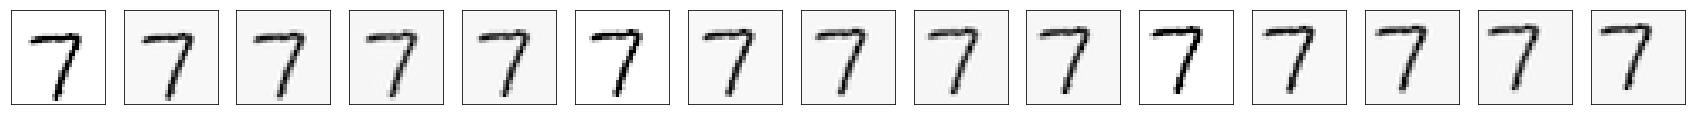

In [8]:
fig_num = 10 # select number which you want to see

fig1 = plt.figure(figsize=(30,30))
for i in range(15):
    snap = fig1.add_subplot(1, 15, i+1)
    snap.set_xticks([])
    snap.set_yticks([])
   
    plt.imshow(train_input[fig_num,i,:784].reshape([28, 28]), cmap = 'Greys')
plt.show()

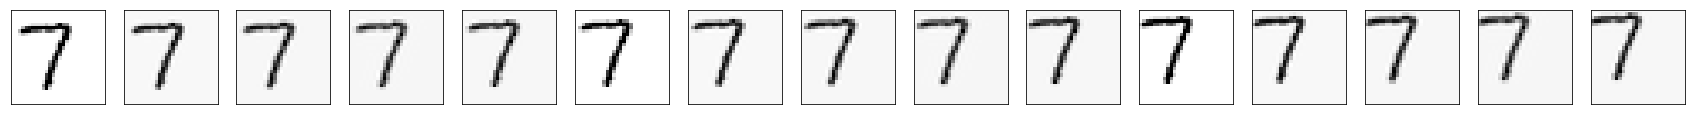

In [9]:
fig2 = plt.figure(figsize=(30,30))
for i in range(15):
    snap = fig2.add_subplot(1, 15, i+1)
    snap.set_xticks([])
    snap.set_yticks([])
   
    plt.imshow(train_output[fig_num,i,:784].reshape([28, 28]), cmap = 'Greys')
plt.show()